In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

sns.set(style="whitegrid")

In [2]:
# Load the Titanic dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
raw_df = df.copy()  # Backup original

# Preview data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
# Basic info
df.info()

# Null value counts
df.isnull().sum()

df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  718 non-null    int64  
 1   Survived     718 non-null    int64  
 2   Pclass       718 non-null    int64  
 3   Name         718 non-null    object 
 4   Sex          718 non-null    int32  
 5   Age          718 non-null    float64
 6   SibSp        718 non-null    float64
 7   Parch        718 non-null    float64
 8   Ticket       718 non-null    object 
 9   Fare         718 non-null    float64
 10  Cabin        97 non-null     object 
 11  Embarked     718 non-null    int32  
dtypes: float64(4), int32(2), int64(3), object(3)
memory usage: 67.3+ KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,447.883008,0.334262,2.512535,0.681058,-0.098537,-0.099225,-0.079499,-0.302242,1.611421
std,259.549777,0.472061,0.715818,0.466391,0.769449,0.775775,0.974165,0.266674,0.726646
min,1.000000,0.000000,1.000000,0.000000,-2.025883,-0.474545,-0.473674,-0.648422,0.000000
25%,220.250000,0.000000,2.000000,0.000000,-0.565736,-0.474545,-0.473674,-0.489568,2.000000
50%,447.500000,0.000000,3.000000,1.000000,-0.104637,-0.474545,-0.473674,-0.411839,2.000000
75%,673.500000,1.000000,3.000000,1.000000,0.270006,0.432793,-0.473674,-0.126366,2.000000
max,891.000000,1.000000,3.000000,1.000000,1.893459,4.062148,6.974147,0.587429,2.000000


In [7]:
# Imputing numerical columns
num_imputer = SimpleImputer(strategy='median')
df['Age'] = num_imputer.fit_transform(df[['Age']]).ravel()
df['Fare'] = num_imputer.fit_transform(df[['Fare']]).ravel()

# Imputing categorical column
cat_imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = cat_imputer.fit_transform(df[['Embarked']]).ravel()

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
label_encoders = {}
categorical_cols = ['Sex', 'Embarked']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [11]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df[numerical_cols].describe()

,Age,Fare,SibSp,Parch
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.272780e-16,3.987333e-18,4.386066e-17,5.382900e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-2.224156e+00,-6.484217e-01,-4.745452e-01,-4.736736e-01
25%,-5.657365e-01,-4.891482e-01,-4.745452e-01,-4.736736e-01
50%,-1.046374e-01,-3.573909e-01,-4.745452e-01,-4.736736e-01
75%,4.333115e-01,-2.424635e-02,4.327934e-01,-4.736736e-01
max,3.891554e+00,9.667167e+00,6.784163e+00,6.974147e+00


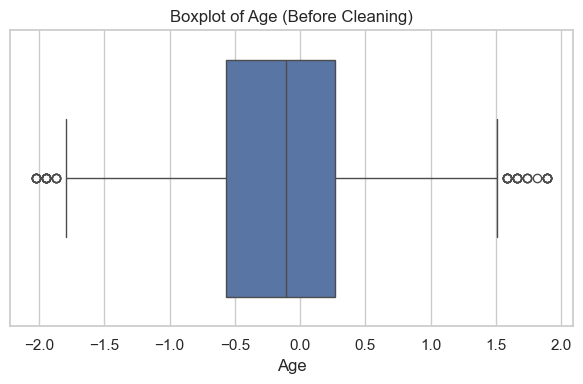

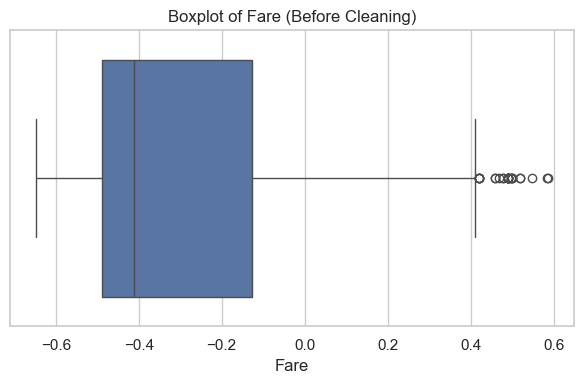

(638, 12)

In [35]:
# Boxplots before cleaning
for col in ['Age', 'Fare']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (Before Cleaning)")
    plt.tight_layout()
    plt.show()

# Function to remove outliers using IQR
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

# Apply outlier removal
for col in ['Age', 'Fare']:
    df = remove_outliers_iqr(df, col)

df.shape

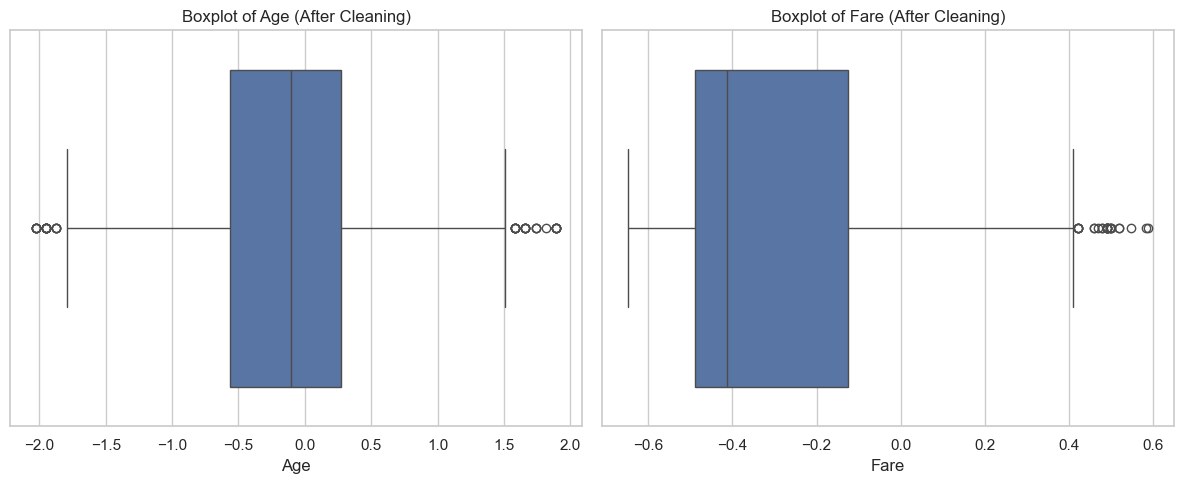

In [29]:
# Boxplots after cleaning
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age (After Cleaning)')

plt.subplot(1,2,2)
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare (After Cleaning)')

plt.tight_layout()
plt.show()

In [23]:
# Final snapshot
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,NaN,2
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,0.432793,-0.473674,113803,0.420730,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,-0.474545,-0.473674,373450,-0.486337,NaN,2
5,6,0,3,"Moran, Mr. James",1,-0.104637,-0.474545,-0.473674,330877,-0.478116,NaN,1


In [25]:
# Save to CSV
df.to_csv("titanic_cleaned.csv", index=False)
df.head(10)  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,NaN,2
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,0.432793,-0.473674,113803,0.420730,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,-0.474545,-0.473674,373450,-0.486337,NaN,2
5,6,0,3,"Moran, Mr. James",1,-0.104637,-0.474545,-0.473674,330877,-0.478116,NaN,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,1.893459,-0.474545,-0.473674,17463,0.395814,E46,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,-0.181487,-0.474545,2.008933,347742,-0.424256,NaN,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,-1.180535,0.432793,-0.473674,237736,-0.042956,NaN,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,-1.949034,0.432793,0.767630,PP 9549,-0.312172,G6,2
12,13,0,3,"Saundercock, Mr. William Henry",1,-0.719436,-0.474545,-0.473674,A/5. 2151,-0.486337,NaN,2
